# LOGISTIC REGRESSION

#### Ignacy Szkudelski

###### Binary logistic regression

###### Ex. 1.: Please follow the steps below: 

a) add a column with values '1'

b) divide the data into parameters (X) and labels/classes (y)

c) data conversion to numpy ( np.array )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
path = os.getcwd() + '\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [2]:
data

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [3]:
X_pd = data[["Exam 1", 'Exam 2']]
y_pd = data["Admitted"]
X_pd = X_pd-X_pd.mean(axis=0)
X_pd = X_pd/X_pd.std(axis=0)
X_pd.insert(0,"Ones", 1)

X = np.array(X_pd)
y = np.array(y_pd)

###### Ex. 2.: Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

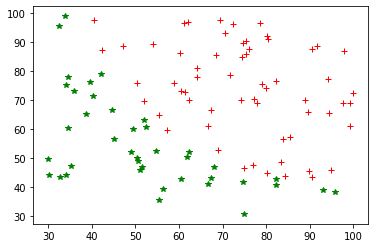

In [4]:
xy_a = data[["Exam 1", "Exam 2"]].where(data["Admitted"]==1)
xy_na = data[["Exam 1", "Exam 2"]].where(data["Admitted"]==0)

plt.plot(xy_a["Exam 1"],xy_a["Exam 2"],'r+')
plt.plot(xy_na["Exam 1"],xy_na["Exam 2"],'g*')

###### Ex. 3.Please implement a logistic function (sigmoid):

In [5]:
def sig(t):
    return 1 / (1 + np.exp(-t))

###### Ex. 4 Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it. 

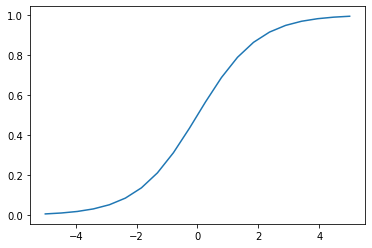

In [6]:
xs = np.linspace(-5,5,int(10/0.5))
ys = sig(xs)
plt.plot(xs,ys)


###### Ex. 5. Based on the above formulas, please implement the cost function J (recommended vectorized solution):

In [7]:
def cost(theta, X, y):
    m = X.shape[0]
    s = sig(np.dot(X,theta))
    a = np.dot(-y.T,np.log(s))
    b = np.dot(-(1-y).T,np.log(1-s))
    j = np.sum(a+b)/m
    return j

theta = np.zeros(3)
cost(theta, X, y)

0.6931471805599453

###### Ex. 6.: Please implement simple gradient function:

In [8]:
def calc_h(theta,x):
    res = sig(np.dot(x,theta)) 
    return res
    
def simple_gradient_helper(X, y, theta, alpha,):
    m = X.shape[0]
    a = calc_h(theta, X)-y
    dj = np.dot(X.T,a)/m
    curr_theta = theta - alpha*dj
    curr_cost = cost(curr_theta, X, y)
    return curr_theta, curr_cost

def simple_gradient(X, y, theta, alpha, it):
    _, curr_cost = simple_gradient_helper(X, y, theta, alpha)
    costs = [curr_cost]
    thetas = [theta]
    for _ in range(it):
        curr_theta, curr_cost = simple_gradient_helper(X, y, thetas[-1], alpha)
        costs.append(curr_cost)
        thetas.append(curr_theta)
    return thetas, costs

In [9]:
alpha = 1
it = 150
theta = np.zeros(3)
thetas, costs = simple_gradient(X, y, theta, alpha, it)
res_theta = thetas[-1]
res_cost = costs[-1]
print("thetas:", thetas[-1], "| cost:", costs[-1])

thetas: [1.41682812 3.36988187 3.122184  ] | cost: 0.20647054423182587


###### Ex. 7.: Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5. 

In [10]:
accuracy_tabele = (calc_h(res_theta,X)>0.5) == (y==1)
false, true = np.bincount(accuracy_tabele)
print("accuracy is:", true/(true+false),'%')

accuracy is: 0.89 %


###### Ex. 8.: [Extra task] Please plot the decision boundary (as a line x2=mx1+c) on the data plot. If you have normalized your data you should use normalized data as background. 

In [11]:
# przykro mi ale pozosrtała część zadania zajęła mi za dużo czasu

## Logistic regression - Python

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

###### Ex. 1.: Get yourself familiar with the object sklearn.linear_model.LogisticRegression and choose appropriate optimalization algorithm, regularization coefficient and create a regression model.

In [24]:
regr = LogisticRegression(C = 0.8,n_jobs=-1, solver='lbfgs',max_iter=150,verbose=1)

###### Ex. 2.: Create an instance and fit the data using fit method.

In [25]:
from sklearn.model_selection import train_test_split
X -= X.mean(axis=0)
X /= X.std(axis=0)
# Z jakiegoś powodu uniemożliwia to wykonane fit-a
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)
regr.fit(x_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=0.8, max_iter=150, n_jobs=-1, verbose=1)

C:\Users\ignsz\AppData\Local\Temp\ipykernel_1760\3187438195.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


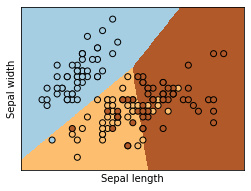

In [26]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = regr.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

###### Ex. 3.: Using method predict_proba please predict the probability of being a member of a given class.

In [27]:
pred_y = regr.predict_proba(x_test)
pred_y
np.argmax(pred_y,axis=1)
y_proc = np.zeros(pred_y.shape)
for i1,i2 in enumerate(y_test):
    y_proc[i1][i2] = 1.0
print("        classs 1 prob. | classs 2 prob.| classs 3 prob"  )  
pred_y

        classs 1 prob. | classs 2 prob.| classs 3 prob


array([[2.16477773e-01, 5.49784678e-01, 2.33737549e-01],
       [9.65923343e-01, 3.20741911e-02, 2.00246597e-03],
       [3.07615031e-03, 3.94869409e-01, 6.02054441e-01],
       [8.48005155e-04, 2.96151249e-01, 7.03000746e-01],
       [9.71838392e-01, 2.01431576e-02, 8.01845062e-03],
       [1.50690587e-01, 7.20385356e-01, 1.28924057e-01],
       [2.99857666e-03, 4.36818456e-01, 5.60182968e-01],
       [9.61839112e-01, 3.46198693e-02, 3.54101863e-03],
       [1.40410679e-04, 1.64109673e-01, 8.35749917e-01],
       [1.42787207e-05, 1.00418051e-01, 8.99567670e-01],
       [9.46786842e-01, 4.75734796e-02, 5.63967858e-03],
       [4.92607746e-03, 3.09911577e-01, 6.85162345e-01],
       [9.85145976e-01, 1.18903475e-02, 2.96367657e-03],
       [1.60433107e-03, 6.14142230e-01, 3.84253439e-01],
       [4.76290976e-03, 1.59187692e-01, 8.36049398e-01],
       [8.74652157e-01, 7.81389569e-02, 4.72088863e-02],
       [9.71838392e-01, 2.01431576e-02, 8.01845062e-03],
       [9.38928618e-01, 5.11393

###### Ex. 4.: Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2).

In [28]:
# podejście 1 - różnica prawdopodobieństw dla każdej próbki i kazdej klasy
m1 = np.sum(np.abs(pred_y-y_proc))
m2 = np.sqrt(np.sum(np.square(pred_y-y_proc)))
print("Błąd syumaryczny: ", m1, "| Średni (geometrycznie) błąd: ", m2)

Błąd syumaryczny:  23.36328942633773 | Średni (geometrycznie) błąd:  3.148230736612115


In [29]:
# podejście 2 - poprawność kwalifikacji do danej klasy na podsawie transhold = 0.5
transhold = 0.5
y_classes = np.zeros(pred_y.shape[0])
oks = np.zeros(pred_y.shape[0])
for ind, el in enumerate(pred_y>0.5):
    false_true = np.bincount(el)
    if len(false_true) != 2:
        oks[ind] = -1
        continue
    t_ind = None
    for nr, val in enumerate(el):
        if val:
            t_ind = nr
            break
    oks[ind] = t_ind
false, true = np.bincount(oks == y_test)
print("accuracy is:", true/(true+false),'%')

accuracy is: 0.8444444444444444 %
